<a href="https://colab.research.google.com/github/NantoCaparachin/Analisis_Descriptivos/blob/main/COVID_casos_nuevos_Peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Analisis de nuevos casos en PERU, utilizando técnicas de visualización

Importamos las librerias

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

importamos la base de datos, directamente de la pagina fuente

In [ ]:
url = 'https://cloud.minsa.gob.pe/s/AC2adyLkHCKjmfm/download'

In [ ]:
df = pd.read_csv(url, sep=';', parse_dates=['FECHA_CORTE','FECHA_RESULTADO'], na_filter=False ,dtype={'EDAD':'Int64','UBIGEO': 'Int64','id_persona': 'Int64'} )
df.head()

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,2022-02-28,CALLAO,CALLAO,CALLAO,PR,25,MASCULINO,2020-06-19,70101,24662494
1,2022-02-28,LIMA,LIMA,CHORRILLOS,PR,37,FEMENINO,2020-09-12,150108,24662689
2,2022-02-28,LIMA,LIMA,SAN MARTIN DE PORRES,PR,25,MASCULINO,2020-12-17,150135,24662153
3,2022-02-28,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27,MASCULINO,2022-01-20,40101,24662155
4,2022-02-28,ICA,PISCO,PISCO,PR,20,FEMENINO,2020-08-22,110501,24662175


# 2. Primer objetivo es conocer la evolución de los nuevos casos en el país

Utilizamos groupby para obtener los datos que vamos a utilizar para este análisis

In [ ]:
df_total = df.groupby(['FECHA_RESULTADO','DEPARTAMENTO']).count()
df_total = df_total.reset_index()
df_total = df_total[['FECHA_RESULTADO','DEPARTAMENTO','FECHA_CORTE']]
df_total = df_total.sort_values(by=['FECHA_RESULTADO'],ascending=True)
df_total.rename(columns={"FECHA_CORTE": "CANTIDAD"},inplace=True)

In [ ]:
df_total.head()

,FECHA_RESULTADO,DEPARTAMENTO,CANTIDAD
0,2020-03-06,LIMA,1
1,2020-03-07,AREQUIPA,1
2,2020-03-07,LIMA,4
3,2020-03-08,LIMA,2
4,2020-03-09,HUANUCO,2


Ploteamos la información utilizando seaborn

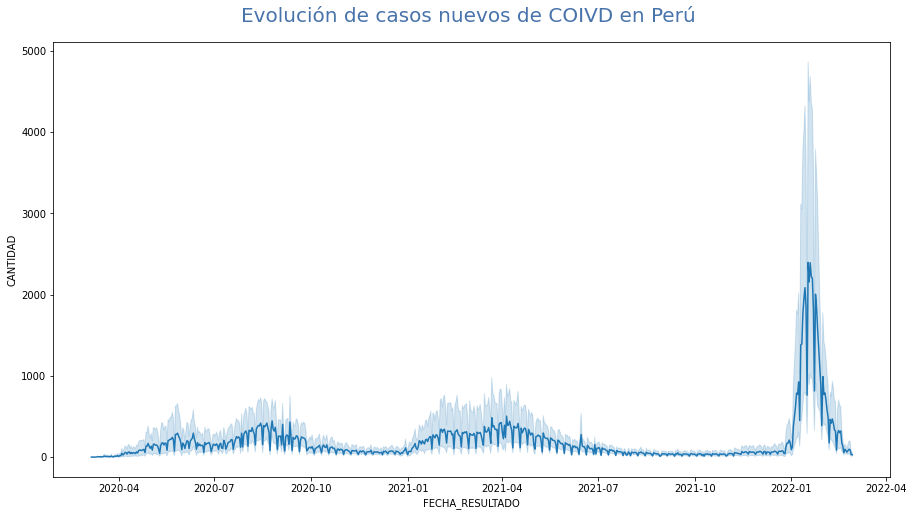

In [ ]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)

ax.set_title('Evolución de casos nuevos de COIVD en Perú ', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})

sns.lineplot(x="FECHA_RESULTADO", y="CANTIDAD",
             #hue="DEPARTAMENTO", se puede activar; sin embargo más adelante se presentará una gráfica donde se puede presentar de una forma más amigable
             data=df_total)

# 3. Segundo objetivo, realizar un análisis a nivel de las regiones del país, sin incluir a Lima

Creamos el código que separe la información, solo con departamentos

In [ ]:
df_prov = df_total[df_total['DEPARTAMENTO']!='LIMA']
df_prov = pd.DataFrame(df_prov)

In [ ]:
type(df_prov)

pandas.core.frame.DataFrame

In [ ]:
df_prov['DEPARTAMENTO'].value_counts()

CALLAO           712
LAMBAYEQUE       708
LA LIBERTAD      708
AREQUIPA         706
PIURA            703
CUSCO            702
ANCASH           702
ICA              701
JUNIN            700
HUANUCO          693
CAJAMARCA        693
PASCO            691
SAN MARTIN       691
LORETO           690
AYACUCHO         690
HUANCAVELICA     690
PUNO             686
TUMBES           685
AMAZONAS         684
TACNA            682
MOQUEGUA         681
APURIMAC         674
UCAYALI          664
MADRE DE DIOS    639
                   4
ARICA              1
Name: DEPARTAMENTO, dtype: int64

Como se observaron resultados de "ARICA" y un campo en vacio " ", se procede a eliminarlos, ya que ninguno de ellos corresponde a un departamento

In [ ]:
df_prov.drop(df_prov[df_prov['DEPARTAMENTO']=='ARICA'].index, inplace=True)
df_prov.drop(df_prov[df_prov['DEPARTAMENTO']==''].index, inplace=True)

Se genera el código con seaborn para visualizar los resultados de cada Región en el contexto nacional

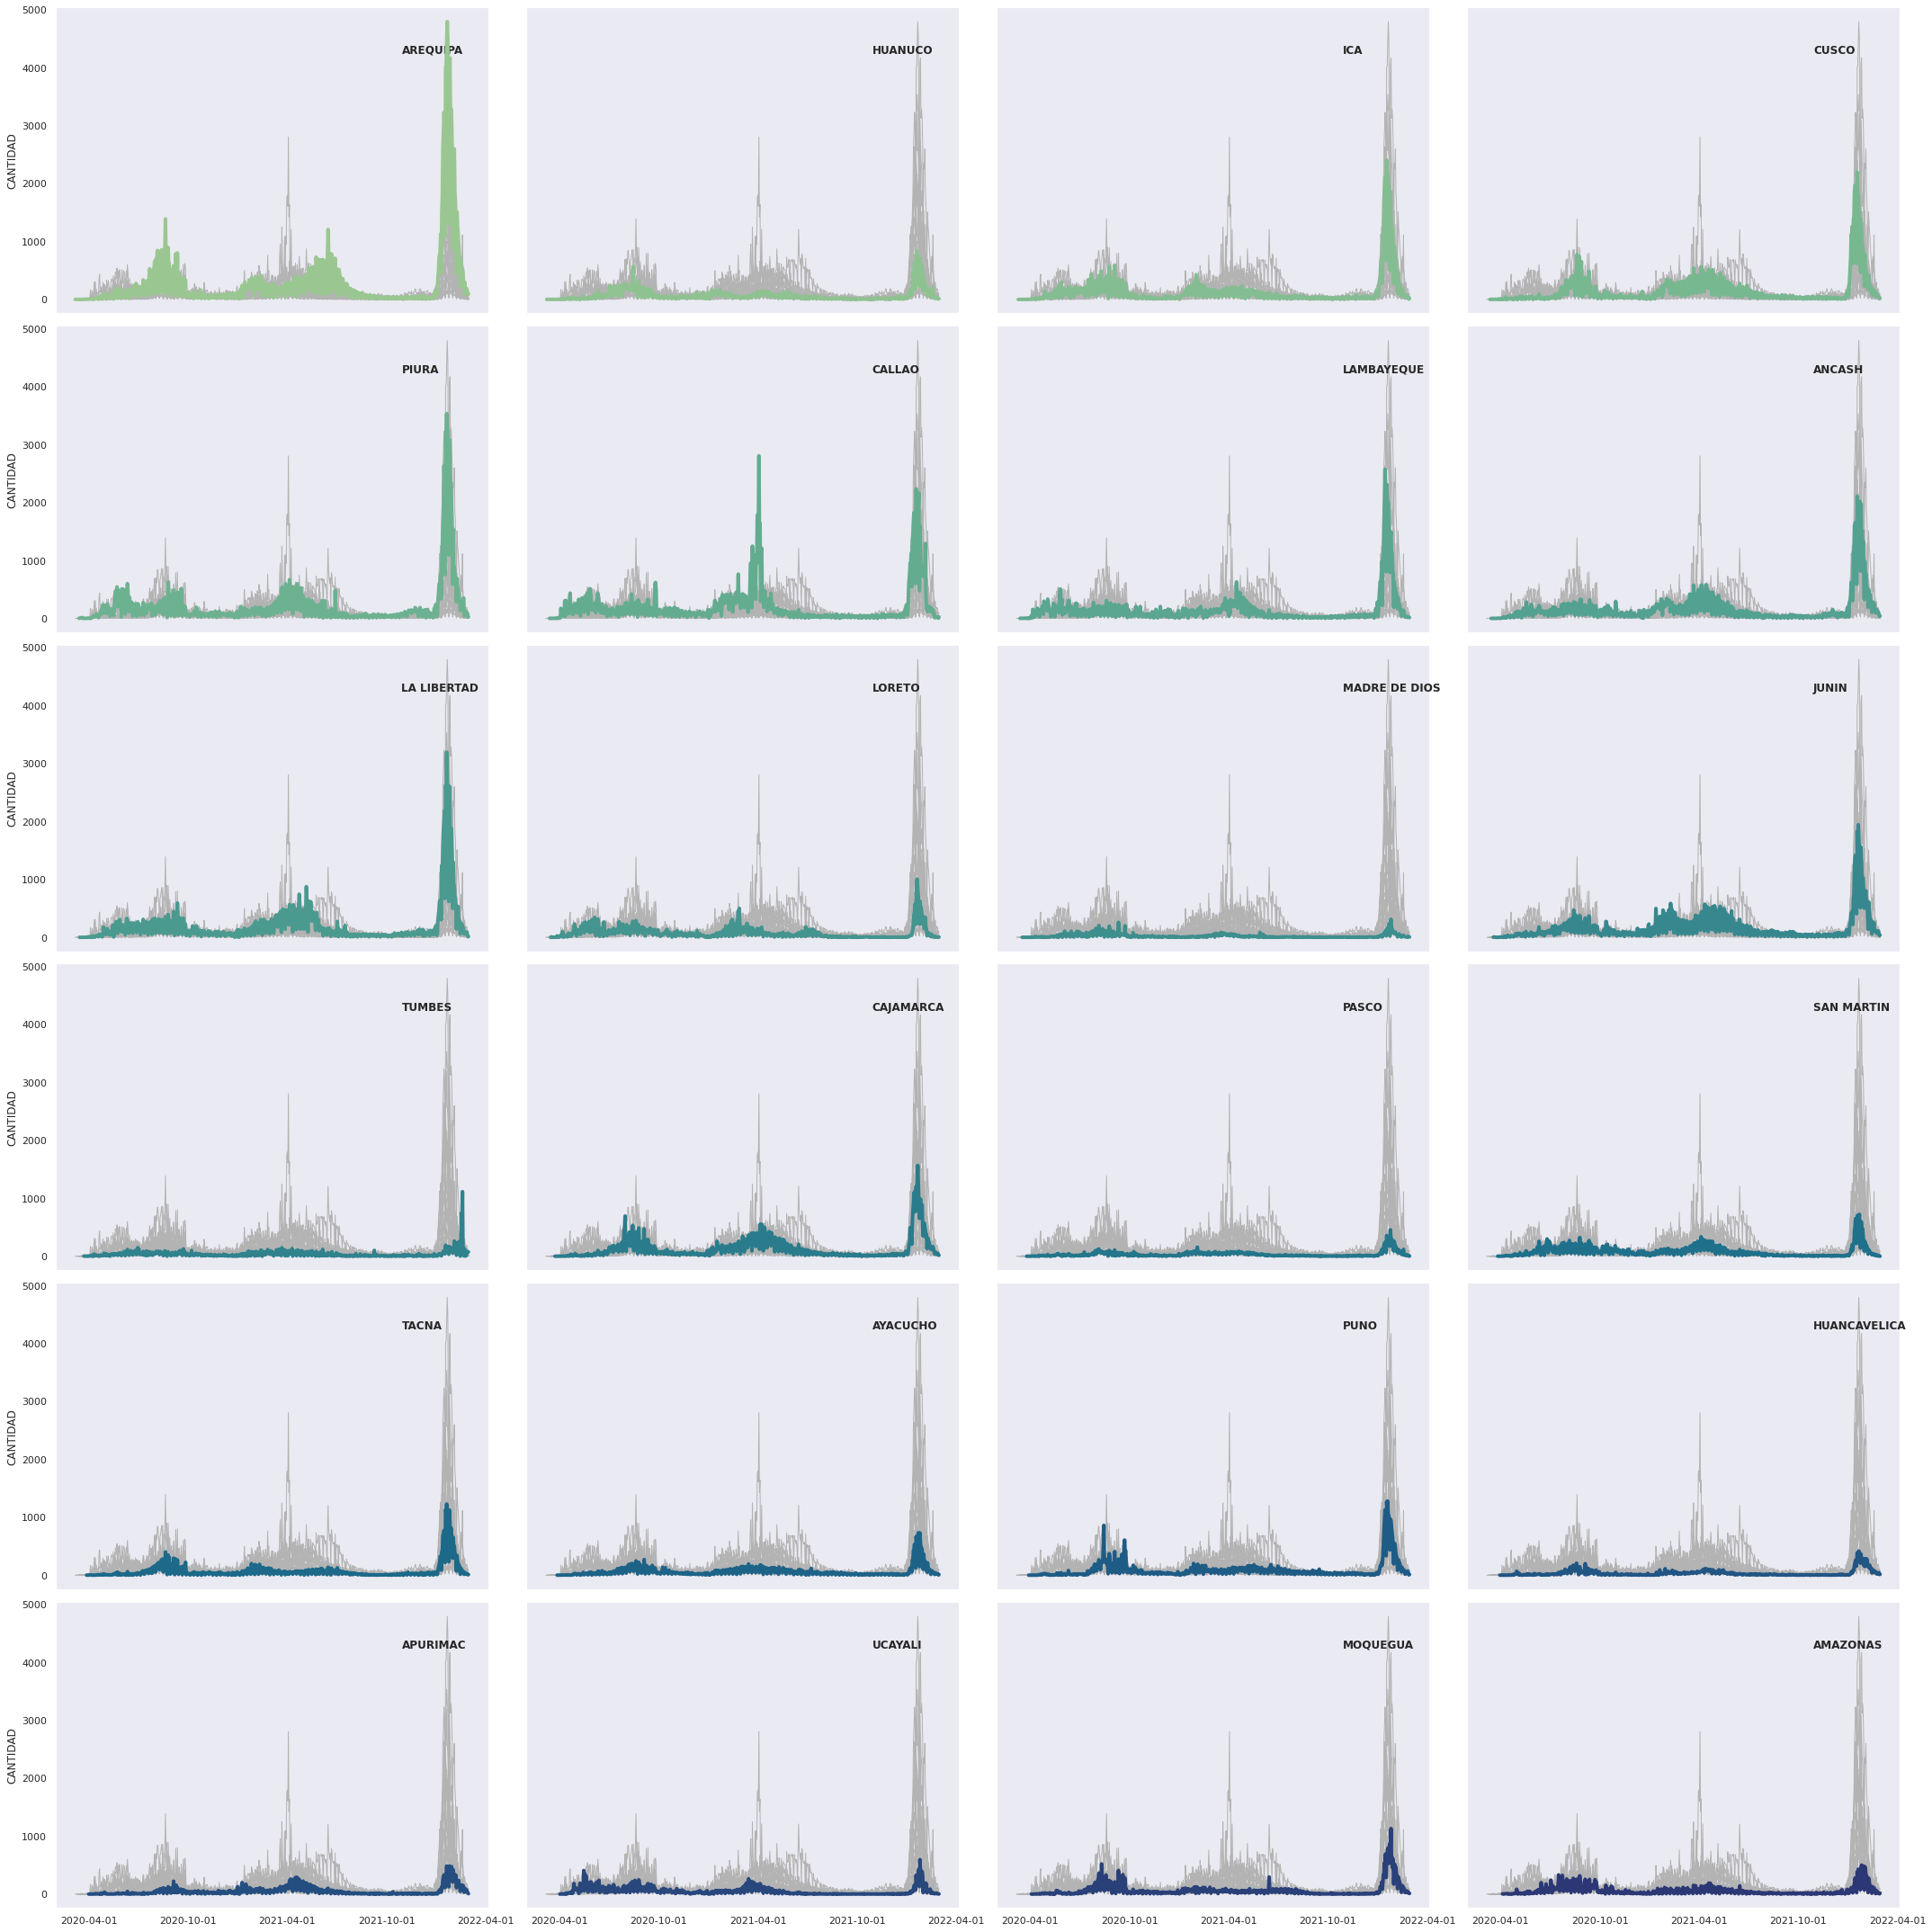

In [ ]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_prov,
    x="FECHA_RESULTADO", y="CANTIDAD", col="DEPARTAMENTO", hue="DEPARTAMENTO",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=4, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for dep, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, dep, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_prov, x="FECHA_RESULTADO", y="CANTIDAD", units="DEPARTAMENTO",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "CANTIDAD")
g.tight_layout()

# 4. Tercer objetivo visualización utilizando Geopandas - Lima Ciudad

He tenido que conseguir una base de datos de los distritos de Lima en formato .geojson. Es lo que necesitamos para una visualización geográfica

In [ ]:
from google.colab import files
uploaded = files.upload()
#Se adjunta el archivo para ustedes tambien puedan cargarlo

Saving peru_distrital_simple.geojson to peru_distrital_simple (1).geojson


In [ ]:
geo_lima = gpd.read_file('peru_distrital_simple.geojson')
geo_lima.head()

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1..."
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0..."
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0..."
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0..."
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9..."


Nos quedamos con la información que corresponde al Departamento de Lima, Provinci de Lima

In [ ]:
geo_lima = geo_lima[(geo_lima['NOMBDEP']=='LIMA')&(geo_lima['NOMBPROV']=='LIMA')]
geo_lima.head()

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry
738,705,150124,15,1501,PUCUSANA,LIMA,LIMA,LEY,9782,22/01/1943,PUCUSANA,0.364808,0.002412,0.365837,0.002418,2908.31,"POLYGON ((-76.75330 -12.42890, -76.75168 -12.4..."
739,706,150138,15,1501,SANTA MARIA DEL MAR,LIMA,LIMA,LEY,13888,16/01/1962,SANTA MARIA DEL MAR,0.145166,0.000648,0.145219,0.000644,775.33,"POLYGON ((-76.75691 -12.40147, -76.75330 -12.4..."
749,716,150129,15,1501,SAN BARTOLO,LIMA,LIMA,LEY,10582,05/05/1946,SAN BARTOLO,0.372091,0.004469,0.368511,0.004458,5363.84,"POLYGON ((-76.66799 -12.36023, -76.68341 -12.3..."
778,745,150127,15,1501,PUNTA NEGRA,LIMA,LIMA,LEY,12096,07/04/1954,PUNTA NEGRA,0.590913,0.010721,0.595851,0.010773,12965.18,"POLYGON ((-76.67842 -12.33349, -76.72539 -12.3..."
783,750,150142,15,1501,VILLA EL SALVADOR,LIMA,LIMA,LEY,23605,01/06/1983,VILLA EL SALVADOR,0.230833,0.002821,0.230891,0.002821,3397.28,"POLYGON ((-76.91096 -12.23349, -76.93986 -12.2..."


In [ ]:
df_lima = df.groupby(['DEPARTAMENTO','PROVINCIA','DISTRITO']).count() #En este caso, como la visualizacion se hara en un solo corte ya no es necesario incluir la variable fecha.
df_lima = df_lima.reset_index()
df_lima = df_lima[['DEPARTAMENTO','PROVINCIA','DISTRITO','FECHA_CORTE']]
df_lima.rename(columns={"FECHA_CORTE": "CANTIDAD"},inplace=True)
df_lima = df_lima[(df_lima['DEPARTAMENTO']=='LIMA')&(df_lima['PROVINCIA']=='LIMA')]
df_lima.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CANTIDAD
1369,LIMA,LIMA,ANCON,5341
1370,LIMA,LIMA,ATE,64112
1371,LIMA,LIMA,BARRANCO,7209
1372,LIMA,LIMA,BREÑA,11890
1373,LIMA,LIMA,CARABAYLLO,29449


Es importante identificar los valores repetidos, estos pueden ser un problema mas adelante que se utilizará la función merge o join

In [ ]:
geo_lima['NOMBDIST'].duplicated().value_counts()

False    43
Name: NOMBDIST, dtype: int64

In [ ]:
df_lima['DISTRITO'].duplicated().value_counts()

False    43
Name: DISTRITO, dtype: int64

Podemos utilizar la funcion merge para unir ambos datasets, aprovecho en homogenizar el nombre que utilzaremos para unir las bases de datos

In [ ]:
df_lima.rename(columns={"DISTRITO": "NOMBDIST"},inplace=True)
df_lima_int = pd.merge(df_lima, geo_lima, on='NOMBDIST')


Tuve que hacer un cambio en el tipo de dato, ya que no me corria el gráfico que está más adelante porque el resultado era un dataframe, pero se necesita un geodataframe

In [ ]:
type(df_lima_int)

pandas.core.frame.DataFrame

In [ ]:
from geopandas import GeoDataFrame

In [ ]:
df_lima_int = GeoDataFrame(df_lima_int)
type(df_lima_int)

geopandas.geodataframe.GeoDataFrame

Por último procedemos a hacer el código para la figura final, en este caso utilizando un mapa de calor para identificar los distritos con mayor número de casos registrados

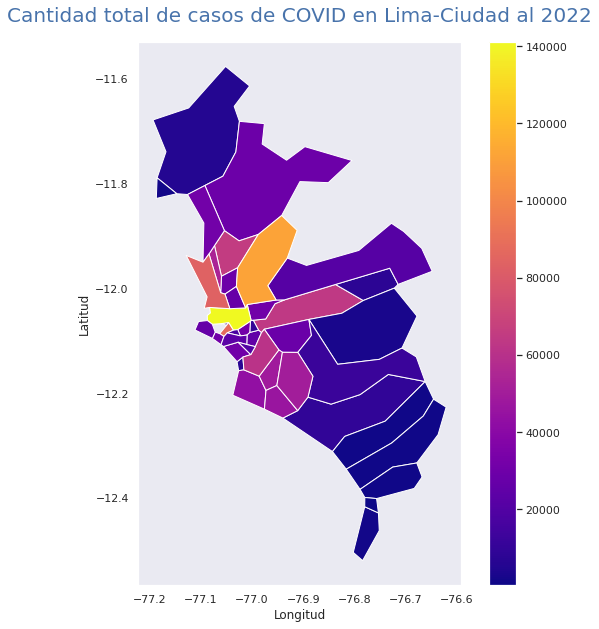

In [ ]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Cantidad total de casos de COVID en Lima-Ciudad al 2022', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
df_lima_int.plot(column='CANTIDAD', cmap='plasma', ax=ax, zorder=5,legend=True)